# __Projeto investigando um conjunto de dados: Titanic__

### Vamos tentar identificar o perfil de passageiro com maior propensão à sobrevivencia ao naufrágio do Titanic por meio da análise de características como sexo, idade e classe do bilhete.

__Mulheres e crianças primeiro?__   
O *código de conduta marítimo*¹ determina, em protocolo não oficial, que em situações de evacuação de desastres as pessoas ajudem os mais vulneráveis a abandonar a cena primeiro, mas de acordo com a base de dados, qual foi influência do sexo e idade dos passageiros na possibilidade de sobrevivencia?

__O status socioeconômico exerceu influência nas chances de sobrevivência?__   
*O Titanic era equipado com grades para impedir a mistura das classes e esses portões eram mantidos fechados. Na pressa que se seguiu à colisão, os comissários de bordo, ocupados em acordar dos passageiros adormecidos e levar grupos de mulheres e crianças ao convés do barco, não tiveram tempo de abrir todos os portões, deixando muitos dos confusos passageiros de terceira classe presos abaixo do convés*². É possível constatar por meio dos dados se as pessoas que viajavam de primeira classe tiveram maior propensão a sobreviver?

__O capitão afunda com o navio?__   
*Convenções e pactos internacionais de navegação*³ indicam que o capitão deve se certificar de que todos estão a salvo antes de se salvar e, portanto, deve ser o último a abandonar o navio. Foi exatamente o que ocorreu com Edward John Smith, que comandava o Titanic na ocasião, mas e quanto à tripulação? É possível identificar os tripulantes e analisar a proporção de sobrevivencia?


Para auxiliar o processo, vamos responder as seguintes perguntas:

1. Qual a faixa etária com maior número de passageiros?
2. Qual a faixa etária com maior número de sobreviventes?
3. Qual a proporção de sobreviventes e não sobreviventes de acordo com a faixa etária?
4. Qual a proporção de homens e mulheres entre os passageiros?
5. E qual a distribuição de homens e mulheres entre os sobreviventes?
6. E qual a proporção de sobreviventes e não sobreviventes de acordo com o sexo?
7. Vamos verificar a distribuição de pessoas entre as classes de passageiros.
8. E a distribuição dos sobreviventes entre as classes?
9. E qual a proporção de sobreviventes e não sobreviventes de acordo com a classe de passageiros?
10. É possível identificar os tripulantes dentre os demais passageiros e analisar a proporção de sobrevivencia?


Importando os pacotes e carregando os dados:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('titanic-data-6.csv')

### Parte I - Visualização inicial dos dados:

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Parte II - Preparação e limpeza dos dados:

Renomeando os títulos das colunas para deixar tudo em letras minúsculas:

In [5]:
df.rename(columns = lambda x: x.lower(),inplace=True)

Confirmando as mudanças:

In [6]:
df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Verificando se há linhas duplicadas:

In [7]:
sum(df.duplicated())

0

Vamos atribuir aos dados faltando em "age" a média dos demais dados da mesma coluna:

In [8]:
df['age'].fillna(df['age'].mean(),inplace=True)

Confirmando as mudanças:

In [9]:
df['age'].isnull().sum()

0

### Parte III - Exploração dos dados:

Criando uma função para calcular a proporção entre os elementos de uma coluna do dataframe.

In [10]:
'''
    Calcula a proporção entre os elementos de uma coluna do dataframe.
    Argumentos:
        param 1: dataframe
        param 2: coluna
    Retorna:
        Um dicionário contendo como chaves os elementos da coluna e valores as proporções de cada elemento da coluna.
'''
def proportion(df,column):
    
    lista1 = []
    lista2 = []
    elements = df[column].unique()
    for element in elements:
        p =(df[df[column] == element][column].count())/df.shape[0]
        lista1.append(element)
        lista2.append(p)
    return dict(zip(lista1, lista2))

Criando uma função para calcular a proporção de elementos entre o total de elementos.

In [11]:
'''
    Calcula proporção de elementos entre o total de elementos.
     Argumentos:
        param 1: dataframe 1 - total de elementos
        param 2: dataframe 2 - elementos
        param 3: coluna
    Retorna:
        Um dicionário contendo como chaves os elementos da coluna e como valores as proporções dos elementos da coluna 
        em relação ao total de elementos.

'''
def proportion_surv(df1,df2,column):
    
    lista1 = []
    lista2 = []
    elements = df1[column].unique()
    for element in elements:
        p = (df2[df2[column] == element][column].count())/(df1[df1[column] == element][column].count())
        lista1.append(element)
        lista2.append(p)
    return dict(zip(lista1, lista2)) 

__Vamos agrupar as idades dos passageiros em 4 grupos de acordo com as seguintes faixas:__
 - Crianças: 0 a 14 anos
 - Jovens: 15 a 29 anos
 - Adultos: 30 a 59 anos
 - Idosos: a partir de 60 anos

Determinando os limites dos intervalos e criando a coluna para classificação dos dados:

In [12]:
interv = [0,14,29,59,100]
interv_names = ['0-14','15-29','30-59','60+']

df['faixa_etaria'] = pd.cut(df['age'],interv,labels=interv_names)

Verificando se a coluna faixa_etaria foi criada corretamente:

In [13]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-59
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-59
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-59


Separando em dois dataframes com os dados dos sobreviventes e dos não sobreviventes:

In [14]:
df_surv = df.query('survived == 1')
df_nsurv = df.query('survived == 0')

### Parte IV - Investigação dos dados:

### Proporção entre sobreviventes e não sobreviventes

In [15]:
proportion(df,'survived')

{0: 0.6161616161616161, 1: 0.3838383838383838}

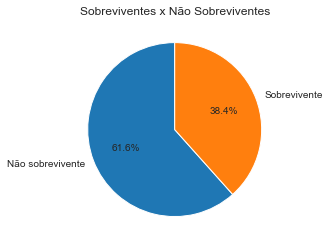

In [16]:
fatias = df.groupby('survived')['survived'].count()
names = ['Não sobrevivente','Sobrevivente']
plt.pie(fatias, labels=names, autopct= "%1.1f%%", startangle= 90)
plt.title('Sobreviventes x Não Sobreviventes');

Apenas 38,4% dos 891 passageiros constantes na base de dados sobreviveram ao naufrágio.

### Análise dos passageiros de acordo com suas idades:

Primeiro vamos fazer um histograma para verificar a distribuição das idades dos passageiros:

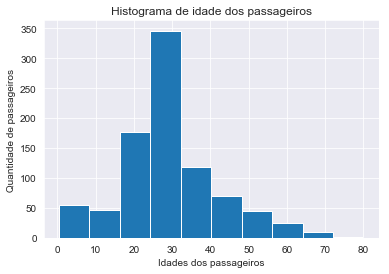

In [17]:
df['age'].plot(kind = 'hist')
plt.title('Histograma de idade dos passageiros')
plt.xlabel('Idades dos passageiros')
plt.ylabel('Quantidade de passageiros');

#### Qual a faixa etária com maior número de passageiros?

In [18]:
proportion(df,'faixa_etaria')

{'15-29': 0.3445566778900112,
 '30-59': 0.5398428731762065,
 '0-14': 0.08641975308641975,
 '60+': 0.029180695847362513}

A faixa etária dos Adultos entre 30 e 59 anos compõem 53,9% dos passageiros.

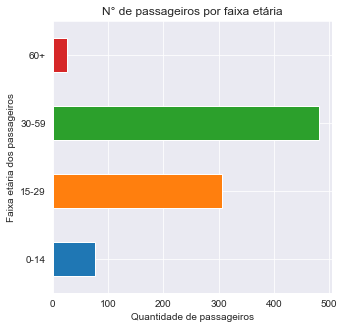

In [19]:
df.groupby('faixa_etaria')['faixa_etaria'].count().plot(kind='barh',figsize=(5,5))
plt.title('N° de passageiros por faixa etária')
plt.xlabel('Quantidade de passageiros')
plt.ylabel('Faixa etária dos passageiros');

#### Qual a faixa etária com maior número de sobreviventes?

In [20]:
proportion(df_surv,'faixa_etaria')

{'30-59': 0.5233918128654971,
 '15-29': 0.32456140350877194,
 '0-14': 0.13157894736842105,
 '60+': 0.02046783625730994}

A faixa etária com maior número de sobreviventes também é a dos Adultos entre 30 e 59 anos, com 52,3%.

#### Mas então qual a proporção de sobreviventes e não sobreviventes de acordo com a faixa etária?

In [21]:
proportion_surv(df,df_surv,'faixa_etaria')

{'15-29': 0.36156351791530944,
 '30-59': 0.37214137214137216,
 '0-14': 0.5844155844155844,
 '60+': 0.2692307692307692}

Abaixo um gráfico de barras empilhadas para ilustrar o resultado:

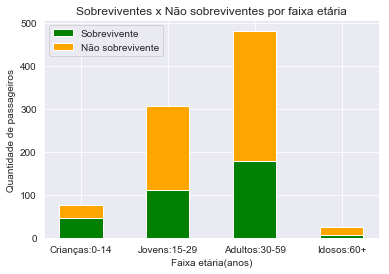

In [22]:
x = df_surv.groupby('faixa_etaria')['faixa_etaria'].count()
y = df_nsurv.groupby('faixa_etaria')['faixa_etaria'].count()
names = ['Crianças:0-14','Jovens:15-29','Adultos:30-59','Idosos:60+']

plt.bar(names, x, 0.5, color='green')
plt.bar(names, y,  0.5,color='orange', bottom = x)
plt.legend(('Sobrevivente','Não sobrevivente'))
plt.title('Sobreviventes x Não sobreviventes por faixa etária')
plt.xlabel('Faixa etária(anos)')
plt.ylabel('Quantidade de passageiros');

A faixa etária com a maior proporção de sobreviventes foi a das Crianças: 58% da população até 14 anos estava entre os sobreviventes.

### Análise dos passageiros de acordo com o sexo:

#### Qual a proporção de homens e mulheres entre os passageiros?

In [23]:
proportion(df,'sex')

{'male': 0.6475869809203143, 'female': 0.35241301907968575}

64,8% dos passageiros que embarcaram no Titanic eram homens enquanto que 35,2% eram mulheres.

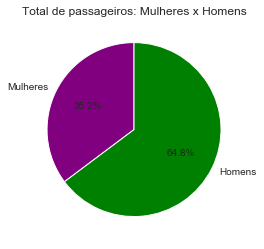

In [24]:
fatias = df.groupby('sex')['sex'].count()
names = ['Mulheres','Homens']
cores = ['purple','green']
plt.pie(fatias, labels=names, autopct= "%1.1f%%", colors= cores, startangle= 90)
plt.title('Total de passageiros: Mulheres x Homens');

#### E qual a distribuição de homens e mulheres entre os sobreviventes?

In [25]:
proportion(df_surv,'sex')

{'female': 0.6812865497076024, 'male': 0.31871345029239767}

Dentre os sobreviventes, 68,1% eram do sexo feminino enquanto apenas 31,9% eram do sexo masculino.

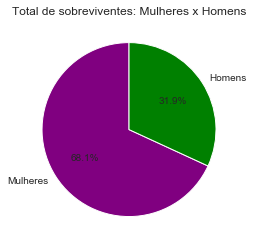

In [26]:
fatias = df_surv.groupby('sex')['sex'].count()
names = ['Mulheres','Homens']
cores = ['purple','green']
plt.pie(fatias, labels=names, autopct= "%1.1f%%", colors= cores, startangle= 90)
plt.title('Total de sobreviventes: Mulheres x Homens');

#### E qual a proporção de sobreviventes e não sobreviventes de acordo com o sexo?

In [27]:
proportion_surv(df,df_surv,'sex')

{'male': 0.18890814558058924, 'female': 0.7420382165605095}

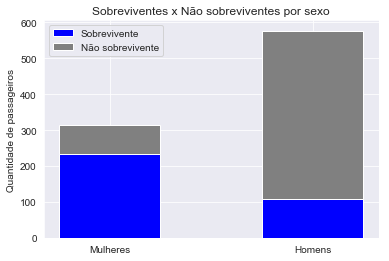

In [28]:
x = df_surv.groupby('sex')['sex'].count()
y = df_nsurv.groupby('sex')['sex'].count()
names = ['Mulheres','Homens']

plt.bar(names, x, 0.5, color='blue')
plt.bar(names, y,  0.5,color='grey', bottom = x)
plt.legend(('Sobrevivente','Não sobrevivente'))
plt.title('Sobreviventes x Não sobreviventes por sexo')
plt.ylabel('Quantidade de passageiros');

De fato, sobreviveram mais mulheres do que homens. Dentre os sobreviventes, 68% eram do sexo feminino.
Das mulheres que embarcaram no Titanic, 74,2% desembarcaram com vida enquanto apenas 18,8% dos homens tiveram a mesma sorte.

### Análise dos passageiros de acordo com o status socioeconômico: 

#### Vamos verificar a distribuição das pessoas entre as classes de passageiros

In [29]:
proportion(df,'pclass')

{3: 0.5510662177328844, 1: 0.24242424242424243, 2: 0.20650953984287318}

55,1% dos passageiros ocupavam lugares da terceira classe na embarcação.

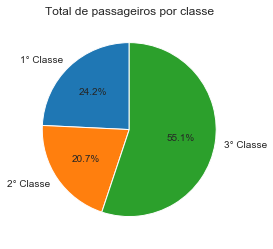

In [30]:
fatias = df.groupby('pclass')['pclass'].count()
names = ['1° Classe','2° Classe','3° Classe']
plt.pie(fatias, labels=names, autopct= "%1.1f%%", startangle= 90)
plt.title('Total de passageiros por classe');

#### E a distribuição dos sobreviventes entre as classes?

In [31]:
proportion(df_surv,'pclass')

{1: 0.39766081871345027, 3: 0.347953216374269, 2: 0.2543859649122807}

39,7% dos sobreviventes pertenciam a primeira classe.

#### E qual a proporção de sobreviventes e não sobreviventes de acordo com a classe de passageiros?

In [32]:
proportion_surv(df,df_surv,'pclass')

{3: 0.24236252545824846, 1: 0.6296296296296297, 2: 0.47282608695652173}

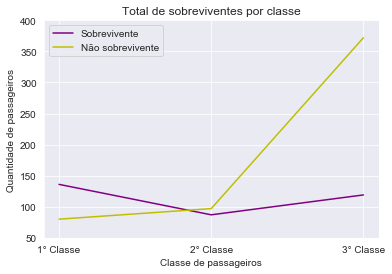

In [33]:
x = df_surv.groupby('pclass')['pclass'].count()
y = df_nsurv.groupby('pclass')['pclass'].count()
names = ['1° Classe','2° Classe','3° Classe']

plt.plot(names, x, color='purple')
plt.plot(names, y, color='y')
plt.ylim(50,400)
plt.legend(('Sobrevivente','Não sobrevivente'))
plt.title('Total de sobreviventes por classe')
plt.xlabel('Classe de passageiros')
plt.ylabel('Quantidade de passageiros');

A terceira classe foi, certamente, a mais afetada pelo acidente . 
Apenas 24% dos passageiros de 3° classe conseguiram sobreviver enquanto que 62,9% dos que embarcaram em ocupações de 1° classe conseguiram desembarcar com vida.

 ### É possível identificar os tripulantes dentre os demais passageiros?

Uma forma de tentar identificar os tripulantes é pelo valor da tarifa, que deveria ser zero.

Criando um dataframe e filtrando as tarifas com valor igual a zero:

In [34]:
df_trip = df.query('fare == 0')
df_trip.shape

(15, 13)

Verificando o dataframe obtido:

In [35]:
df_trip.head(15)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,faixa_etaria
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,30-59
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,30-59
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,15-29
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S,30-59
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,15-29
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S,30-59
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S,30-59
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S,30-59
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,30-59
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S,30-59


Vale observar conjuntamente com o valor da tarifa igual a zero, os seguintes pontos:
- Todos são homens;
- Todos estão na faixa etária dos Jovens ou Adultos;
- Todos embarcaram em Southampton, Reino Unido, porto de onde o Titanic partiu;
- Nenhum deles estava com filhos, conjuges, irmãos ou qualquer tipo de familiar.

Não é possível constatar que os 15 passageiros listados eram, de fato, tripulantes do Titanic, mas os dados nos permitem considerar que há uma possibilidade de que esta informação seja verdadeira.

####  E analisar a proporção de sobrevivencia?

In [36]:
proportion_surv(df_trip,df_surv,'fare')

{0.0: 0.06666666666666667}

Supondo que sejam tripulantes os 15 passageiros listados, apenas 1 sobreviveu, ou seja, 6,6% da tripulação.

### Parte V - Conclusão:

Foi possível constatar por meio da investigação dos dados que os passageiros com maior propensão a sobreviver eram mulheres, crianças e ocupantes da 1° classe.


Já os passageiros com menor propensão a sobreviver eram homens, adultos e aqueles que ocupavam lugares na 3° classe.


Na época e até os dias atuais o naufrágio causa indignação pela falta de botes salva-vidas, regulamentos e procedimentos inadequados e o tratamento desigual das classes de passageiros durante a evacuação.  
Os impactos causados pelo desastre implicaram em alterações significativas nos regulamentos de segurança marítima.

### Parte VI - Limitações:

Na Parte I - Visualização inicial dos dados, identificamos que a coluna "age" não possui valores para alguns passageiros.
Para facilitar o processo de análise, ajustamos a coluna completando os dados faltantes com a média das idades dos demais passageiros.   

Os demais dados faltantes (colunas "cabin" e "embarked") não foram alterados pois não foram utilizados nas analises.   

Não foi possível identificar com precisão os tripulantes da embarcação uma vez que os dados constantes na base não são suficientes para assegurar com assertividade que tal afirmação é verdadeira para um dado passageiro.

Referências:   
¹ [Wikipedia: Mulheres e crianças primeiro](https://pt.wikipedia.org/wiki/Mulheres_e_crian%C3%A7as_primeiro)   
² [Wikipedia: Passageiros do RMS Titanic](https://pt.wikipedia.org/wiki/Passageiros_do_RMS_Titanic#cite_note-ouvre-29)   
³ [O comandante tem a obrigação legal de ser o último a abandonar a embarcação em caso de naufrágio?](https://www.jota.info/opiniao-e-analise/artigos/o-comandante-tem-a-obrigacao-legal-de-ser-o-ultimo-a-abandonar-a-embarcacao-em-caso-de-naufragio-15052015)   